# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [2]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager 
# executable_path = {'executable_path': ChromeDriverManager().install()}
# browser = Browser('chrome', **executable_path, headless=True)

import matplotlib.pyplot as plt
import pandas as pd

In [3]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [4]:
# Visit the website
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [5]:
# Create a Beautiful Soup Object
html = browser.html
mars = soup(html, 'html.parser')

# object for just the table 
table = mars.find('table',class_="table")

In [9]:
# Extract all rows of data
rows = table.find_all('tr',class_="data-row")
for r in rows:
    print(r.find('td').text.strip())
#     print(r.find_all('td'))
#     print(r.text)

13
24
35
46
57
68
79
112
114
123
134
145
156
163
170
171
172
173
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
233
234
235
236
237
238
239
240
241
242
3
4
5
6
7
8
9
10
11
12
14
15
16
17
18
19
20
21
22
23
25
26
27
28
29
30
31
32
33
34
36
37
38
39
40
41
42
43
44
45
47
48
49
50
51
52
53
54
55
56
58
59
60
61
62
63
64
65
66
67
69
70
71
72
73
74
75
76
77
78
80
81
82
83
84
85
86
87
88
89
91
92
93
94
95
96
97
98
99
100
102
103
106
107
108
109
116
117
118
119
120
121
122
124
125
126
127
128
129
130
131
132
133
135
136
137
138
139
140
141
142
143
144
146
147
148
149
150
151
152
153
154
155
157
158
161
162
164
165
166
167
168
169
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
286
276
287
283
281
275
280
279
282
284
278
277
285
274
272
273
288
268
270
271
269
289
291
290

In [10]:
# test = rows
# print(test[0].decompose())

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [11]:
# Create an empty list
mars_list = []
# Loop through the scraped data to create a list of rows
for r in rows:
    # select the data of the row
    temp = r.find_all('td')
    
    # index each data point and strip the tags, then append to list
    mars_list.append([\
        temp[0].text.strip(),\
        temp[1].text.strip(),\
        temp[2].text.strip(),\
        temp[3].text.strip(),\
        temp[4].text.strip(),\
        temp[5].text.strip(),\
        temp[6].text.strip()]\
    )
    
mars_list

[['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-75.0', '747.0'],
 ['172', '2012-09-05', '30', '166', '6', '-74.0

In [27]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(mars_list, columns = ['id','terrestrial_date','sol','ls','month','min_temp','pressure'])

In [28]:
# Confirm DataFrame was created successfully
df

id terrestrial_date   sol   ls month min_temp pressure
0       13       2012-08-17    11  156     6    -76.0    740.0
1       24       2012-08-18    12  156     6    -76.0    741.0
2       35       2012-08-19    13  157     6    -74.0    732.0
3       46       2012-08-20    14  157     6    -74.0    740.0
4       57       2012-08-21    15  158     6    -78.0    740.0
...    ...              ...   ...  ...   ...      ...      ...
1861  1889       2018-02-23  1973  133     5    -78.0    730.0
1862  1892       2018-02-24  1974  134     5    -77.0    729.0
1863  1894       2018-02-25  1975  134     5    -76.0    729.0
1864  1893       2018-02-26  1976  135     5    -77.0    728.0
1865  1895       2018-02-27  1977  135     5    -77.0    727.0

[1866 rows x 7 columns]

### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [29]:
# Examine data type of each column
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [30]:
# Change data types for data analysis
df['id'] = df['id'].astype('int64')
df['terrestrial_date'] = df['terrestrial_date'].apply(pd.to_datetime) #.to_datetime()
df['sol'] = df['sol'].astype('int64')
df['ls'] = df['ls'].astype('int64')
df['month'] = df['month'].astype('int64')
df['min_temp'] = df['min_temp'].astype('float')
df['pressure'] = df['pressure'].astype('float')

In [31]:
# Confirm type changes were successful by examining data types again
df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [78]:
# 1. How many months are there on Mars?
print(f'There are {df["month"].max()} months on Mars according to this dataset.')

There are 12 months on Mars according to this dataset.


In [81]:
# 2. How many Martian days' worth of data are there?

# difference between min/max doesn't guarantree data was recorded every day
# total = df['sol'].max() - df['sol'].min()
# print(f'There are {total} days worth of data.')

print(f'There are {df["sol"].nunique()} days worth of data.')

There are 1866 days worth of data.


In [39]:
# 3. What is the average low temperature by month?
df_month = df.groupby('month')
month_temp = df_month['min_temp'].mean()
month_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.301370
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

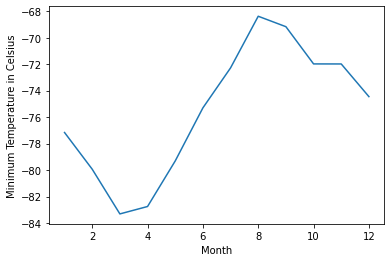

In [43]:
# Plot the average temperature by month
month_temp.plot()
plt.xlabel('Month')
plt.ylabel('Minimum Temperature in Celsius')
plt.show()

In [74]:
# Identify the coldest and hottest months in Curiosity's location
print("The third month is the coldest, and the eight month is the warmest")

The third month is the coldest, and the eight month is the warmest


In [50]:
# 4. Average pressure by Martian month
month_press = df_month['pressure'].mean()
month_press

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.095890
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

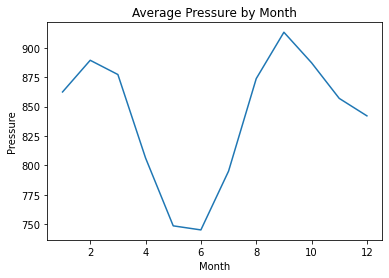

The lowest pressure is in the 6th month, and the highest in the 9th month.


In [82]:
# Plot the average pressure by month
month_press.plot()
plt.xlabel('Month')
plt.ylabel('Pressure')
plt.title('Average Pressure by Month')
plt.show()
print("The lowest pressure is in the 6th month, and the highest in the 9th month.")

In [70]:
# 5. How many terrestrial (earth) days are there in a Martian year?

# locate the instances where ls = 0
print(df['terrestrial_date'].loc[df['ls'] == 0])

# Taking the differences between two instances, which would be a revolution of Mars
mars_year = df['terrestrial_date'].iloc[924] - df['terrestrial_date'].iloc[304] 
print(f'There are {mars_year} in a Martian year.')

303    2013-08-01
304    2013-08-02
924    2015-06-19
925    2015-06-20
1578   2017-05-06
1579   2017-05-07
Name: terrestrial_date, dtype: datetime64[ns]
There are 686 days 00:00:00 in a Martian year.


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [73]:
# Write the data to a CSV
df.to_csv('../Export/Mars_data.csv')

In [75]:
browser.quit()